#### 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#### 2. Generating the dataset using numpy

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random points around different centers for each class
X_class0 = np.random.randn(50, 2) + np.array([2, 2])   # Class 0 centered around (2, 2)
X_class1 = np.random.randn(50, 2) + np.array([7, 7])   # Class 1 centered around (7, 7)
X_class2 = np.random.randn(50, 2) + np.array([2, 7])   # Class 2 centered around (2, 7)
X_class3 = np.random.randn(50, 2) + np.array([7, 2])   # Class 3 centered around (7, 2)
X_class4 = np.random.randn(50, 2) + np.array([5, 5])   # Class 4 centered around (5, 5)

# Labels for the data points
y_class0 = np.zeros(len(X_class0))
y_class1 = np.ones(len(X_class1))
y_class2 = np.full(len(X_class2), 2)
y_class3 = np.full(len(X_class3), 3)
y_class4 = np.full(len(X_class4), 4)

# Combine all data into a single dataset
X_train = np.vstack((X_class0, X_class1, X_class2, X_class3, X_class4))
y_train = np.concatenate((y_class0, y_class1, y_class2, y_class3, y_class4))

# New test point to classify


#### 3. building knn_predict

In [3]:
# KNN function to predict the class of the new point
def knn_predict(X_train, y_train, test_point, k=3):
    # Calculate Euclidean distances from the test point to all other points
    distances = np.sqrt(((X_train - test_point) ** 2).sum(axis=1))
    # Get nearest neighbors
    nearest_neighbors = np.argsort(distances)[:k]
    # Get labels of nearest neighbors
    nearest_labels = [y_train[i] for i in nearest_neighbors]
    # Voting for the majority class
    majority_vote = Counter(nearest_labels).most_common(1)[0][0]
    return majority_vote


##### **Define the point for which you want to predict**

In [4]:
new_point = np.array([4, 10])

In [5]:
# Predict the class of the new point
predicted_class = knn_predict(X_train, y_train, new_point, k=3)

#### 4. Plotting all points and new point

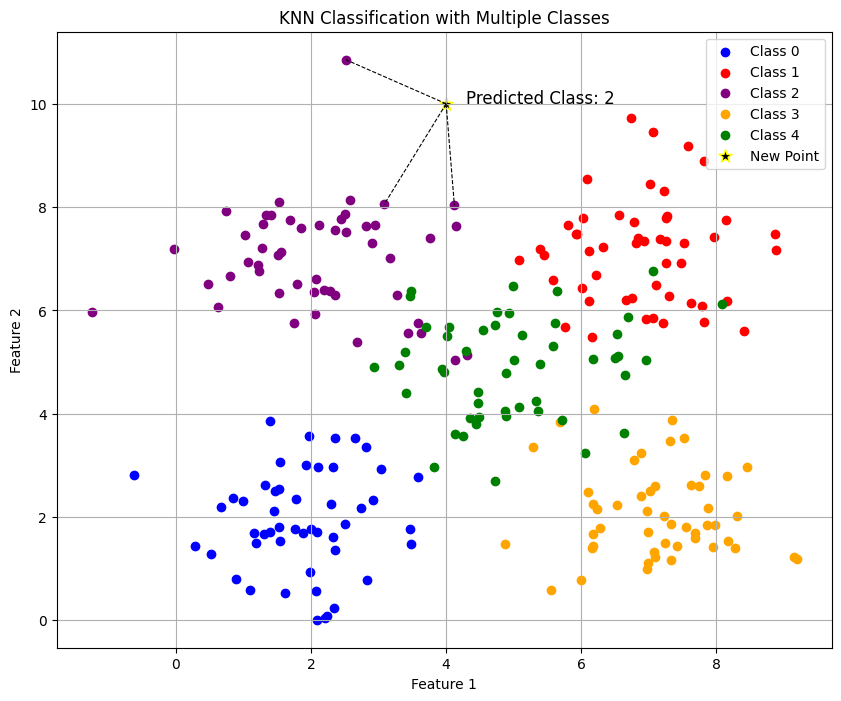

In [6]:
# Plotting the data points and the new point
plt.figure(figsize=(10, 8))

# Plot each class with a unique color
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Class 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='purple', label='Class 2')
plt.scatter(X_class3[:, 0], X_class3[:, 1], color='orange', label='Class 3')
plt.scatter(X_class4[:, 0], X_class4[:, 1], color='green', label='Class 4')

# Plot the new point with a different style
plt.scatter(new_point[0], new_point[1], color='black', s=100, label='New Point', edgecolor='yellow', marker='*')

# Annotate the plot with the predicted class
plt.text(new_point[0] + 0.3, new_point[1], f"Predicted Class: {int(predicted_class)}", fontsize=12, color="black")

# Draw connecting lines from the new point to its nearest neighbors
for idx in np.argsort(np.sqrt(((X_train - new_point) ** 2).sum(axis=1)))[:3]:
    plt.plot([new_point[0], X_train[idx, 0]], [new_point[1], X_train[idx, 1]], 'k--', lw=0.8)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Classification with Multiple Classes")
plt.legend()
plt.grid()
plt.show()
